In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import hiive.mdptoolbox 
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import mdptoolbox, mdptoolbox.example
import gym
import matplotlib.pyplot as plt
import time
import hiive.mdptoolbox.openai

In [9]:
def make_time_array(run_stats, variables):
    cumulative_sum = 0
    times = []
    output_dict = {v:[] for v in variables}
    output_dict["times"] = times
    for result in run_stats:
        times.append(result["Time"])
        for v in result:
            if v in variables:
                output_dict[v].append(result[v])
    return output_dict

In [11]:
def plot_simple_data(x_var, y_var, x_label, y_label, title, figure_size=(4,3)):
    plt.rcParams["figure.figsize"] = figure_size
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_var, y_var)
    plt.show()

def plot_data_legend(x_vars, x_label, all_y_vars, y_var_labels, y_label, title, y_bounds=None):
    colors = ['red','orange','black','green','blue','violet']
    plt.rcParams["figure.figsize"] = (4,3)

    i = 0
    for y_var in all_y_vars:
        plt.plot(x_vars, y_var, color=colors[i % 6], label=y_var_labels[i])
        i += 1
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if y_bounds != None:
        plt.ylim(y_bounds)
    leg = plt.legend()
    plt.show()

## Frozen Lake

In [291]:
P, R = hiive.mdptoolbox.example.openai("FrozenLake-v1")

## Q-Learning

In [301]:
st = time.time()
fl_q_mdp = hiive.mdptoolbox.mdp.QLearning(P, R, 0.999, epsilon=0.9, n_iter=10**7, alpha=0.95, skip_check=True)
fl_q_mdp.run()
end = time.time()
end-st
fl_q_mdp.epsilon_decay

0.99

In [303]:
fl_q_mdp.policy

(2, 3, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0)

In [304]:
fl_q_mdp.time

400.029584646225

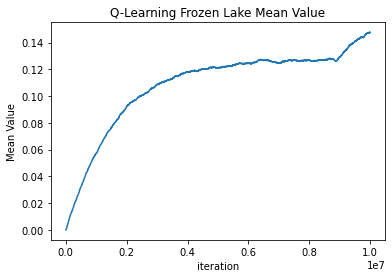

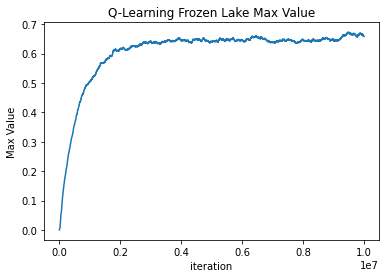

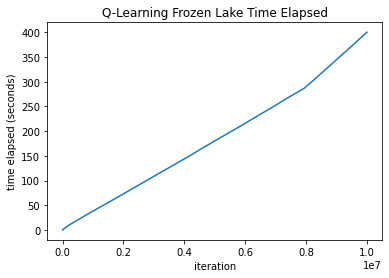

In [305]:
fl_q_curated_results = make_time_array(fl_q_mdp.run_stats, ["Mean V", "Max V", "Iteration"])
plot_simple_data(fl_q_curated_results["Iteration"], fl_q_curated_results["Mean V"], 
                 "iteration", "Mean Value", "Q-Learning Frozen Lake Mean Value", figure_size=(6,4))
plot_simple_data(fl_q_curated_results["Iteration"], fl_q_curated_results["Max V"], 
                 "iteration", "Max Value", "Q-Learning Frozen Lake Max Value", figure_size=(6,4))
plot_simple_data(fl_q_curated_results["Iteration"], fl_q_curated_results["times"], 
                 "iteration", "time elapsed (seconds)", "Q-Learning Frozen Lake Time Elapsed", figure_size=(6,4))

In [317]:
fl_q_mdp.run_stats[-1]

{'State': 5,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 400.029584646225,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.999,
 'V[0]': 0.10050785863573158,
 'Max V': 0.6585685902607449,
 'Mean V': 0.14757346792035406,
 'Iteration': 10000000}

## Value Iteration

In [254]:
st = time.time()
dict_args = {"transitions":P, "reward":R, "gamma":0.99,"epsilon":10**(-10), "max_iter":10**5, "skip_check":True}
fl_v_mdp = hiive.mdptoolbox.mdp.ValueIteration(**dict_args)
fl_v_mdp.run()
end = time.time()
end-st

0.022006988525390625

In [183]:
fl_v_mdp.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [255]:
fl_v_mdp.time

0.021005868911743164

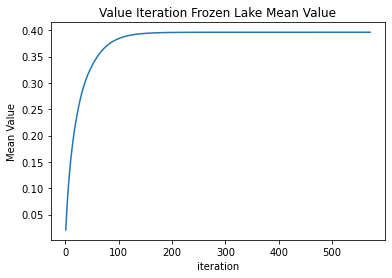

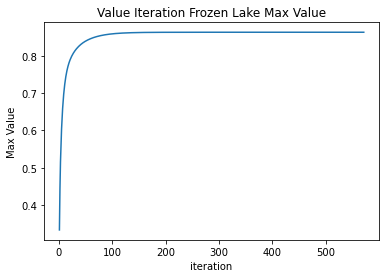

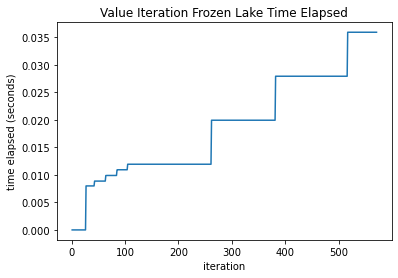

In [185]:
fl_v_curated_results = make_time_array(fl_v_mdp.run_stats, ["Mean V", "Max V", "Iteration"])
plot_simple_data(fl_v_curated_results["Iteration"], fl_v_curated_results["Mean V"], 
                 "iteration", "Mean Value", "Value Iteration Frozen Lake Mean Value", figure_size=(6,4))
plot_simple_data(fl_v_curated_results["Iteration"], fl_v_curated_results["Max V"], 
                 "iteration", "Max Value", "Value Iteration Frozen Lake Max Value", figure_size=(6,4))
plot_simple_data(fl_v_curated_results["Iteration"], fl_v_curated_results["times"], 
                 "iteration", "time elapsed (seconds)", "Value Iteration Frozen Lake Time Elapsed", figure_size=(6,4))

Text(0, 0.5, 'Reward')

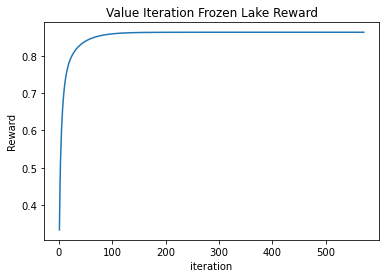

In [257]:
reward = []
iteration = []
for i in range(len(fl_v_mdp.run_stats)):
    reward.append(fl_v_mdp.run_stats[i]['Reward'])
    iteration.append(fl_v_mdp.run_stats[i]['Iteration'])

plt.title('Value Iteration Frozen Lake Reward')
plt.plot(iteration,reward)
plt.xlabel('iteration')
plt.ylabel('Reward')

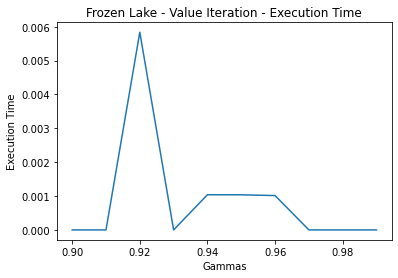

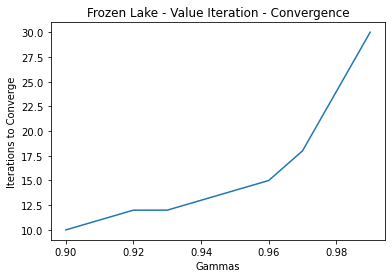

In [181]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10
list_scores=[0]*10

for i in range(0,10):
    st=time.time()
    fl_v = hiive.mdptoolbox.mdp.ValueIteration(P,R, i/100+0.9, max_iter = 10**5,skip_check=True)
    fl_v.run()
    end=time.time()
    gamma_arr[i]=i/100+0.9
    iters[i] = fl_v.iter
    time_array[i]=end-st

plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Frozen Lake - Value Iteration - Execution Time')
plt.ylabel('Execution Time')
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake - Value Iteration - Convergence')
plt.show()

## Policy Iteration

In [247]:
st = time.time()
fl_p_mdp = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.96, max_iter = 30,skip_check=True)
fl_p_mdp.run()
end = time.time()
end-st

0.00865316390991211

In [248]:
fl_p_mdp.policy

(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [250]:
fl_p_mdp.time

0.00865316390991211

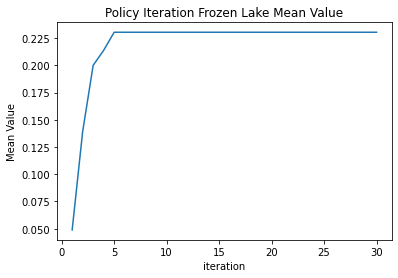

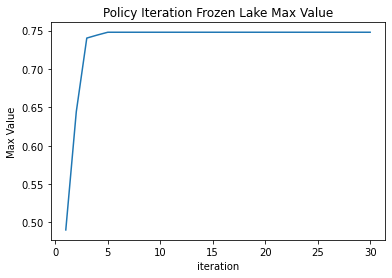

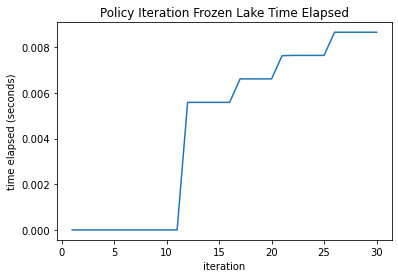

In [251]:
fl_p_curated_results = make_time_array(fl_p_mdp.run_stats, ["Mean V", "Max V", "Iteration"])
plot_simple_data(fl_p_curated_results["Iteration"], fl_p_curated_results["Mean V"], 
                 "iteration", "Mean Value", "Policy Iteration Frozen Lake Mean Value", figure_size=(6,4))
plot_simple_data(fl_p_curated_results["Iteration"], fl_p_curated_results["Max V"], 
                 "iteration", "Max Value", "Policy Iteration Frozen Lake Max Value", figure_size=(6,4))
plot_simple_data(fl_p_curated_results["Iteration"], fl_p_curated_results["times"], 
                 "iteration", "time elapsed (seconds)", "Policy Iteration Frozen Lake Time Elapsed", figure_size=(6,4))

Text(0, 0.5, 'Reward')

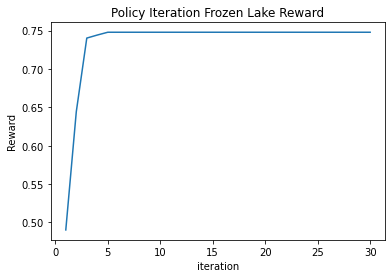

In [252]:
reward = []
iteration = []
for i in range(len(fl_p_mdp.run_stats)):
    reward.append(fl_p_mdp.run_stats[i]['Reward'])
    iteration.append(fl_p_mdp.run_stats[i]['Iteration'])

plt.title('Policy Iteration Frozen Lake Reward')
plt.plot(iteration,reward)
plt.xlabel('iteration')
plt.ylabel('Reward')

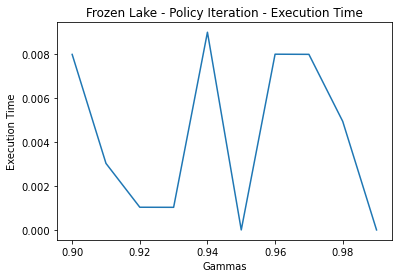

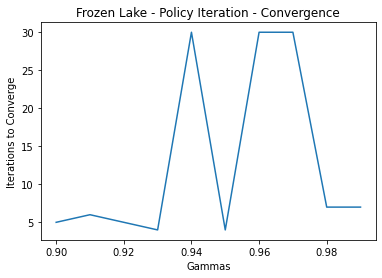

In [198]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    fl_p = hiive.mdptoolbox.mdp.PolicyIteration(P,R, i/100+0.9, max_iter = 30,skip_check=True)
    fl_p.run()
    end=time.time()
    gamma_arr[i]=i/100+0.9
    iters[i] = fl_p.iter
    time_array[i]=end-st

plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Frozen Lake - Policy Iteration - Execution Time')
plt.ylabel('Execution Time')
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake - Policy Iteration - Convergence')
plt.show()

## Forest management

In [343]:
P, R = hiive.mdptoolbox.example.forest(S=2000, p=0.01)

## Q Learning

In [233]:
st = time.time()
fm_q_mdp = hiive.mdptoolbox.mdp.QLearning(P, R, 0.999, epsilon=0.1,epsilon_decay=0.95, n_iter=10**7, alpha=0.95, skip_check=True)
fm_q_mdp.run()
end = time.time()
end-st

456.9246573448181

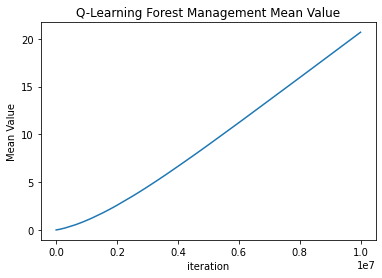

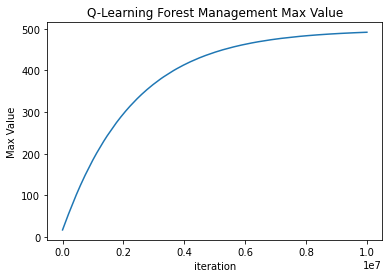

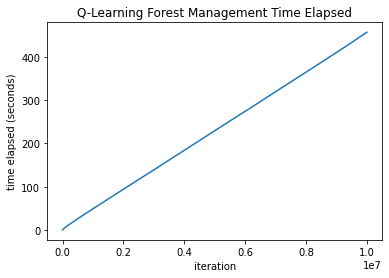

In [234]:
fm_q_curated_results = make_time_array(fm_q_mdp.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(fm_q_curated_results["Mean V"])
plot_simple_data(fm_q_curated_results["Iteration"], fm_q_curated_results["Mean V"], 
                 "iteration", "Mean Value", "Q-Learning Forest Management Mean Value", figure_size=(6,4))
plot_simple_data(fm_q_curated_results["Iteration"], fm_q_curated_results["Max V"], 
                 "iteration", "Max Value", "Q-Learning Forest Management Max Value", figure_size=(6,4))
plot_simple_data(fm_q_curated_results["Iteration"], fm_q_curated_results["times"], 
                 "iteration", "time elapsed (seconds)", "Q-Learning Forest Management Time Elapsed", figure_size=(6,4))

In [318]:
fm_q_mdp.run_stats[-1]

{'State': 970,
 'Action': 1,
 'Reward': 1.0,
 'Error': 0.47590125607756095,
 'Time': 456.9136197566986,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.999,
 'V[0]': 491.2596363518832,
 'Max V': 491.7621134901664,
 'Mean V': 20.67922710510473,
 'Iteration': 10000000}

## Value Iteration

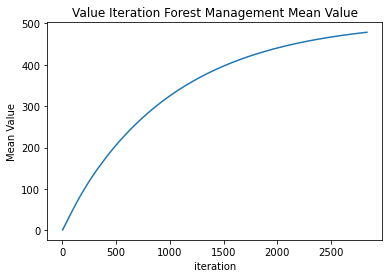

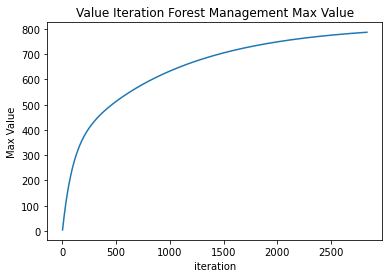

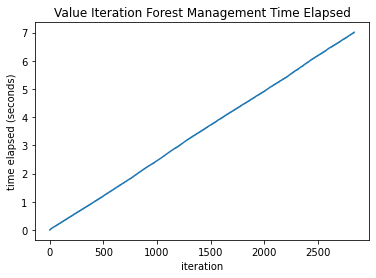

In [308]:
dict_args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":10**(-10), "max_iter":10**5, "skip_check":True}
fm_v_mdp = hiive.mdptoolbox.mdp.ValueIteration(**dict_args)
fm_v_mdp.run()
fm_v_curated_results = make_time_array(fm_v_mdp.run_stats, ["Mean V", "Max V", "Iteration"])
plot_simple_data(fm_v_curated_results["Iteration"], fm_v_curated_results["Mean V"], 
                 "iteration", "Mean Value", "Value Iteration Forest Management Mean Value", figure_size=(6,4))
plot_simple_data(fm_v_curated_results["Iteration"], fm_v_curated_results["Max V"], 
                 "iteration", "Max Value", "Value Iteration Forest Management Max Value", figure_size=(6,4))
plot_simple_data(fm_v_curated_results["Iteration"], fm_v_curated_results["times"], 
                 "iteration", "time elapsed (seconds)", "Value Iteration Forest Management Time Elapsed", figure_size=(6,4))

In [309]:
fm_v_mdp.time

7.01379132270813

In [319]:
fm_v_mdp.run_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 786.7897149345526,
 'Error': 0.029199522577528114,
 'Time': 7.01379132270813,
 'Max V': 786.7897149345526,
 'Mean V': 478.75450017373066,
 'Iteration': 2835}

Text(0, 0.5, 'Reward')

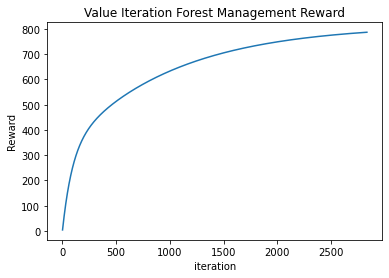

In [310]:
reward = []
iteration = []
for i in range(len(fm_v_mdp.run_stats)):
    reward.append(fm_v_mdp.run_stats[i]['Reward'])
    iteration.append(fm_v_mdp.run_stats[i]['Iteration'])

plt.title('Value Iteration Forest Management Reward')
plt.plot(iteration,reward)
plt.xlabel('iteration')
plt.ylabel('Reward')

In [314]:
reward[-1]

786.7897149345526

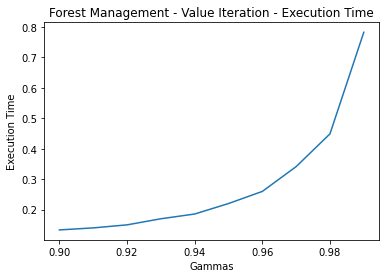

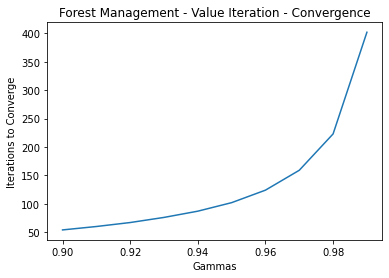

In [221]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    fm_v = hiive.mdptoolbox.mdp.ValueIteration(P,R, i/100+0.9, max_iter = 10**5,skip_check=True)
    fm_v.run()
    end=time.time()
    gamma_arr[i]=i/100+0.9
    iters[i] = fm_v.iter
    time_array[i]=end-st

plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Forest Management - Value Iteration - Execution Time')
plt.ylabel('Execution Time')
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management - Value Iteration - Convergence')
plt.show()

## Policy Iteration

In [344]:
st = time.time()
fm_p_mdp = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.999, max_iter = 500,skip_check=True)
fm_p_mdp.run()
end = time.time()
end-st

25.392292976379395

In [333]:
fm_p_mdp.time

139.85156774520874

In [334]:
fm_p_mdp.run_stats[-1]

{'State': None,
 'Action': None,
 'Reward': 815.9600379883411,
 'Error': 3.410605131648481e-13,
 'Time': 139.85156774520874,
 'V[0]': 497.2373190682764,
 'Max V': 815.9600379883411,
 'Mean V': 507.9248232275287,
 'Iteration': 188}

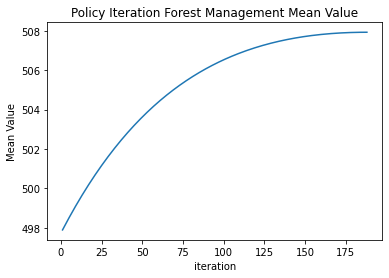

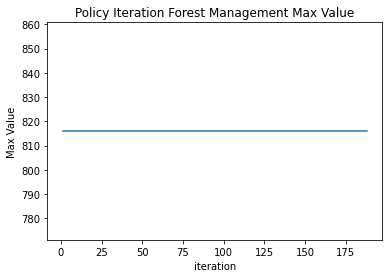

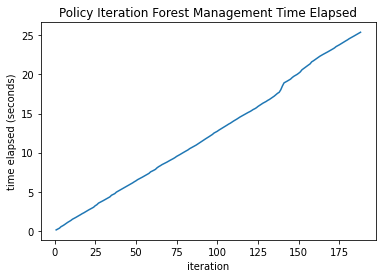

In [345]:
fm_p_curated_results = make_time_array(fm_p_mdp.run_stats, ["Mean V", "Max V", "Iteration"])
plot_simple_data(fm_p_curated_results["Iteration"], fm_p_curated_results["Mean V"], 
                 "iteration", "Mean Value", "Policy Iteration Forest Management Mean Value", figure_size=(6,4))
plot_simple_data(fm_p_curated_results["Iteration"], [round(x,2) for x in fm_p_curated_results["Max V"]], 
                 "iteration", "Max Value", "Policy Iteration Forest Management Max Value", figure_size=(6,4))
plot_simple_data(fm_p_curated_results["Iteration"], fm_p_curated_results["times"], 
                 "iteration", "time elapsed (seconds)", "Policy Iteration Forest Management Time Elapsed", figure_size=(6,4))

Text(0, 0.5, 'Reward')

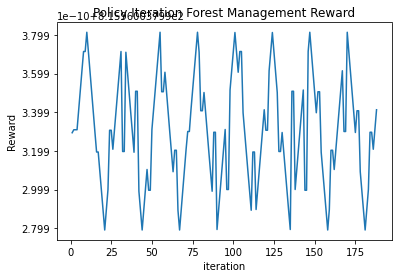

In [346]:
reward = []
iteration = []
for i in range(len(fm_p_mdp.run_stats)):
    reward.append(fm_p_mdp.run_stats[i]['Reward'])
    iteration.append(fm_p_mdp.run_stats[i]['Iteration'])

plt.title('Policy Iteration Forest Management Reward')
plt.plot(iteration,reward)
plt.xlabel('iteration')
plt.ylabel('Reward')

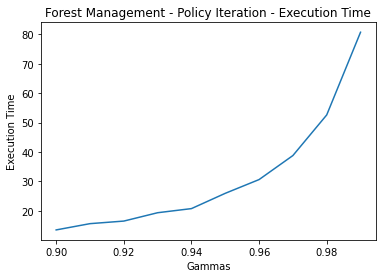

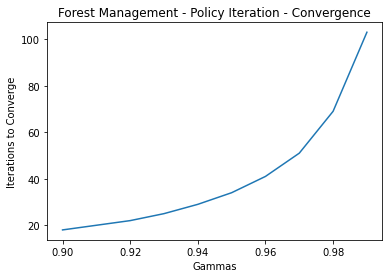

In [341]:
time_array=[0]*10
gamma_arr=[0]*10
iters=[0]*10

for i in range(0,10):
    st=time.time()
    fm_p = hiive.mdptoolbox.mdp.PolicyIteration(P,R, i/100+0.9, max_iter = 500,skip_check=True)
    fm_p.run()
    end=time.time()
    gamma_arr[i]=i/100+0.9
    iters[i] = fm_p.iter
    time_array[i]=end-st

plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Forest Management - Policy Iteration - Execution Time')
plt.ylabel('Execution Time')
plt.show()

plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Forest Management - Policy Iteration - Convergence')
plt.show()